answer 1)

1.   dataset has missing value in "post_index_in_post_list": NaN
2.   dataset has missing value in "post_token" : NaN this means that data set has two section which are "click_post" and "load_post_page"
3.   dataset has missing value in "device_id" : #NAME?
4.   The "Tokens" column contains a list-like structure, which might require special handling for certain types of analysis.

5.  The "device_id" and "source_event_id" columns appear to have unique identifiers. We need to verify if any duplicates are present, which could indicate issues like repeated entries or data redundancy.

In [2]:
import pandas as pd


df = pd.read_excel('divar_data.xlsx')
df = df[df['device_id'] != '#NAME?']

loads = df[df['action']== 'load_post_page']
clicks = df[df['action'] == 'click_post']
loads_count = loads['tokens'].str.len()/10
df['loads_count'] = loads_count
#in ke list aval bashe ro bayad lahaz konim - ex : third list of a query has 3 but
load_of_first_list = df[(df['action']== 'load_post_page') & (df['post_page_offset']== 0 ) ]
load_of_first_list_count =load_of_first_list['tokens'].str.len()

# check if loads_count lower than 100 cuz each token lenth is 10
lower_than_10 = loads_count[loads_count < 10]
# answer2_1
percent_query_dark = (lower_than_10.sum()/ loads_count.sum()) *100

print(percent_query_dark,"%")



0.8732120406105317 %


In [3]:
#answer2_2
is_clicked = df.groupby('device_id').sum()
is_clicked_index = is_clicked['action'].str.contains("click_post" , na=False)
not_clicked_count = 0
clicked_count = 0
# not_clicked_count = (is_clicked_index == false).sum()
for i in is_clicked_index:
  if i == False:
    not_clicked_count += 1
  else: clicked_count += 1
print((not_clicked_count / len(loads) )*100 ,"%")


1.3092640349137077 %


In [6]:
# answer 3-1
import numpy as np
is_clicked['post_token_count'] =  is_clicked['post_token'].str.len() / 8
is_clicked['click_percentage'] =  np.where(is_clicked['loads_count'] != 0 , (is_clicked['post_token_count'] / is_clicked['loads_count']) * 100 , np.nan)
is_clicked.head()

,action,created_at,source_event_id,post_page_offset,tokens,post_index_in_post_list,post_token,loads_count,post_token_count,click_percentage
device_id,,,,,,,,,,
-0CO6Hc_QiqH4T6IRnAkMw,click_postload_post_page,3219094687858,0835703f-bbd7-415c-892a-f612661ea1650835703f-b...,0.0,"[wXvvHbMd, wXvrWNJ2, wXvvmeT9, wXvno4aJ, wXvLX...",1.0,wXvvHbMd,24.0,1.0,4.166667
-0IGwculQbu66z8q_Vm9MA,click_postclick_postclick_postclick_postclick_...,122325464540763,f0266c88-62fd-43de-b39c-fa0c0db285cbf7000f54-2...,0.0,0,19985.0,wXsPCshJwXjb9jlDwXhn71ikwXY3upM6wXvvEtkGwXcfWj...,0.0,76.0,NaN
-1wIhljjS_yhOisAOhIdNA,load_post_pageload_post_pageclick_postclick_po...,14485908194175,ab319d84-421e-4b7f-8887-8d3529ae42fbab319d84-4...,10.0,"[wXvrXnXD, wXv70f3R, wXvLn2Ez, wXvH3a0-, wXv72...",70.0,wXvjy3zbwXv3oKLDwXqPS49rwXvTpU4l,120.0,4.0,3.333333
-2HNBT8SRiC3klN90eGvNQ,click_postclick_postclick_postclick_postclick_...,32190924754915,d759e99f-2ec0-4024-9f70-674ce152278bd759e99f-2...,6.0,"[wXu3e23w, wXuPNC2M, wXu_8PZL, wXurURCV, wXurT...",341.0,wXvX3j8-wXu3uxSdwXvHz_VZwXvjTNuMwXvbBa29wXvXom...,96.0,16.0,16.666667
-2Hh978WRIuDcnICSpbzjg,click_postclick_postclick_post,4828641150597,742253a6-734c-4f65-9fec-2a03845b86af742253a6-7...,0.0,0,54.0,wXN7ONzIwXq7N2RrwXvvlsoV,0.0,3.0,NaN


in the previous code block we suprisingly saw some queries that didn't have load_post_page action but had click_post action which cannot be happened, therefor I think we should drop columns with "NaN" in the  click_percentage column

In [7]:
# answer 3_2
first_click_index = clicks.groupby('device_id').first()
first_click_index = first_click_index['post_index_in_post_list']
first_click_index



,post_index_in_post_list
device_id,
-0CO6Hc_QiqH4T6IRnAkMw,1.0
-0IGwculQbu66z8q_Vm9MA,3.0
-1wIhljjS_yhOisAOhIdNA,47.0
-2HNBT8SRiC3klN90eGvNQ,4.0
-2Hh978WRIuDcnICSpbzjg,38.0
...,...
zsozTupGRlOefdBRLVoNKQ,142.0
ztcsKyk4Tw-nw7Q8PIERsQ,1.0
zwF_8nudT1aCBJpDmGtCWw,6.0


<Axes: >

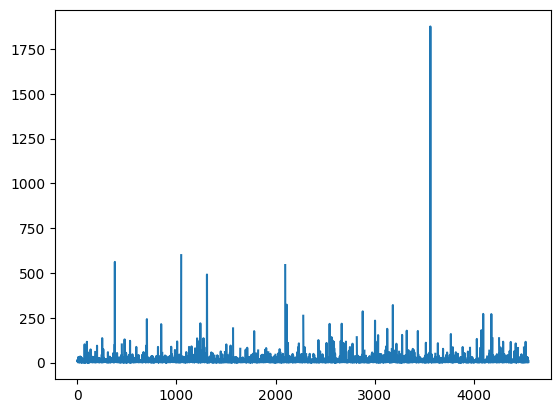

In [16]:
# answer 3-3
grouped_df = clicks.groupby('device_id').agg({'post_index_in_post_list': list}).reset_index()
grouped_df['post_index_in_post_list']
def mean_distance(value_list):
    if len(value_list) < 2:
        return np.nan  # Return NaN if the list has less than 2 elements (no distance to compute)
    value_list.sort()
    distances = [value_list[i+1] - value_list[i] for i in range(len(value_list) - 1)]
    distances.append(np.min(value_list))
    return np.mean(distances)

grouped_df['mean_distance'] = grouped_df['post_index_in_post_list'].apply(mean_distance)
grouped_df.head()
# grouped_df['mean_distance']

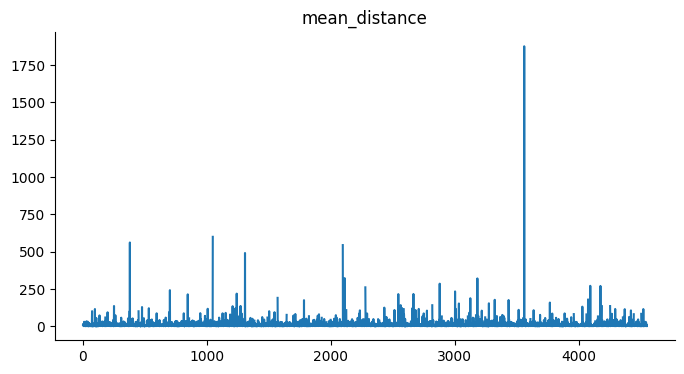

In [13]:
# @title mean_distance

from matplotlib import pyplot as plt
grouped_df['mean_distance'].plot(kind='line', figsize=(8, 4), title='mean_distance')
plt.gca().spines[['top', 'right']].set_visible(False)

In [37]:
# answer 3_4
clicks['isin_first_3'] = clicks['post_index_in_post_list' ] < 4
jk = clicks['isin_first_3'].transform(lambda x: 1 if   x == True  else  0)
jk

<ipython-input-37-8f7f74c2b79e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clicks['isin_first_3'] = clicks['post_index_in_post_list' ] < 4


,isin_first_3
5429,1
5430,0
5431,0
5432,0
5433,0
...,...
108842,0
108843,0
108844,0
108845,0


answer 3-5 :
"click_percentage" would be the best metric between those are asked in question "3" because it shows the popularity of an advertisement based on users history of clicking it. therefore we tend to calculate the mean of that metric in whole dataFrame in order to find out what "click_percentage" is good acutally.

In [10]:
is_clicked['click_percentage'].mean()

9.491174670331816

answer 4:yes, we can implement a model based on these 4 metric probably logistic regression or naive baysi Naive Bayes is the best to decide whether the next ads would be clicked or not using  metrics like "click_percentage" and "post_index_in_post_list"

and about guessing approximately other metrics using one of them I'm not sure if we can, cuz we dont use linear reggression , acctually if we could ,me at this point couldn't say it surely.